<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Choose-a-function-on-which-to-illustrate-gradient-descent.-Its-output-should-depend-on-at-least-two-variables-and-it-should-not-be-trivial-to-minimise-(for-example-it-should-have-multiple-minima-or-a-long-shallow-valley).-(See-for-example-http://www.sfu.ca/-ssurjano/optimization.html)" data-toc-modified-id="Choose-a-function-on-which-to-illustrate-gradient-descent.-Its-output-should-depend-on-at-least-two-variables-and-it-should-not-be-trivial-to-minimise-(for-example-it-should-have-multiple-minima-or-a-long-shallow-valley).-(See-for-example-http://www.sfu.ca/-ssurjano/optimization.html)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Choose a function on which to illustrate gradient descent. Its output should depend on at least two variables and it should not be trivial to minimise (for example it should have multiple minima or a long shallow valley). (See for example <a href="http://www.sfu.ca/" target="_blank">http://www.sfu.ca/</a> ssurjano/optimization.html)</a></span></li><li><span><a href="#Investigate-the-ability-of-plain-vanilla-gradient-descent-to-find-the-global-minimum.-Experiment-with-different-step-sizes.-Show-graphically-or-otherwise-how-the-number-of-steps-to-convergence-varies-with-step-size.-Provide-graphical-output-that-shows-the-function-and-the-path-followed-by-gradient-descent." data-toc-modified-id="Investigate-the-ability-of-plain-vanilla-gradient-descent-to-find-the-global-minimum.-Experiment-with-different-step-sizes.-Show-graphically-or-otherwise-how-the-number-of-steps-to-convergence-varies-with-step-size.-Provide-graphical-output-that-shows-the-function-and-the-path-followed-by-gradient-descent.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Investigate the ability of plain vanilla gradient descent to find the global minimum. Experiment with different step sizes. Show graphically or otherwise how the number of steps to convergence varies with step size. Provide graphical output that shows the function and the path followed by gradient descent.</a></span></li><li><span><a href="#Experiment-with-two-variants-of-gradient-descent-to-see-if-they-improve-in-any-way-on-the-above-results.-Communicate-your-results-with-easy-to-understand-text,-tables-and-graphics-(and/or-animations)." data-toc-modified-id="Experiment-with-two-variants-of-gradient-descent-to-see-if-they-improve-in-any-way-on-the-above-results.-Communicate-your-results-with-easy-to-understand-text,-tables-and-graphics-(and/or-animations).-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experiment with two variants of gradient descent to see if they improve in any way on the above results. Communicate your results with easy to understand text, tables and graphics (and/or animations).</a></span></li></ul></div>

*Group 24*

**Why is gradient descent important in machine learning?** 

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. (ML Cheats cite)
It is used specifically in machine learning as it helps to identify the most suited parameters which would give the minimal cost in that specific model.

**How does plain vanilla gradient descent work?** 

Vanilla gradient descent is the simplest form of gradient descent. Its main feature is that we take small steps in the direction of the gradient. It basically calculates the error for each sample in the data and updates the model only after the training example has been calculated. Advantage of vanilla gradient descent is that it is computationally efficient.

**Two Modifications to plain vanilla gradient descent:**

Nag and Momentum variants have been used to modify the plain vanilla gradient descent.

# Part 1: Gradient Descent

In [6]:
# import library
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML, Image
import matplotlib.animation as anim
from matplotlib import animation
from IPython.display import HTML
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

%matplotlib inline

## Choose a function on which to illustrate gradient descent. Its output should depend on at least two variables and it should not be trivial to minimise (for example it should have multiple minima or a long shallow valley). (See for example http://www.sfu.ca/ ssurjano/optimization.html)

In [7]:
#Chosen function 
# http://www.sfu.ca/~ssurjano/beale.html
Matyas_Function = lambda x, y: 0.26*(x**2 + y**2) - 0.48*x*y


def mat_grad(x,y):
    dx = 0.26 * 2*x - 0.48*y
    dy = 0.26 * 2*y - 0.48*x
    return dx,dy

In [8]:
# 2 variable pv gradient descent
def gdpv(x_init, y_init, n_iter, steps, tol= 1e-5):
    
    x, y = x_init,y_init
    z = Matyas_Function(x, y)

    x_path = []
    y_path = []
    z_path = []

    x_path.append(x)
    y_path.append(y)
    z_path.append(z)
    
    dx, dy = mat_grad(x, y)

    for i in range(n_iter):
        if np.abs(dx) < tol or np.isnan(dx) or np.abs(dy) < tol or np.isnan(dy):
            break
        dx, dy = mat_grad(x, y)
        x += -steps * dx
        y += -steps * dy
        x_path.append(x)
        y_path.append(y)
        z = Matyas_Function(x, y)
        z_path.append(z)

    if np.isnan(dx) or np.isnan(dy):
        print('\033[1m  Plain Vanilla  \033[0m \nExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol:
        print('\033[1m  Plain Vanilla  \033[0m \nDid not converge')
    else:
        print('\033[1m  Plain Vanilla  \033[0m \nConverged in {} steps.  \nLoss fn {:0.4f} \nAchieved at coordinates x,y = ({:0.4f}, {:0.4f})'.format(i, z, x, y))
        
        return x_path,y_path

In [9]:
gdpv(x_init=2, y_init=3, n_iter=2000, steps=0.1, tol=1e-8)



  Plain Vanilla   
Converged in 1999 steps.  
Loss fn 0.0000 
Achieved at coordinates x,y = (0.0008, 0.0008)


([2,
  2.04,
  2.07504,
  2.10561984,
  2.13218936064,
  2.15515340319744,
  2.1748763095846506,
  2.191685972346312,
  2.2058774796569267,
  2.217716395818299,
  2.2274417137070257,
  2.2352685119769977,
  2.24139034654141,
  2.2459814029063323,
  2.2491984332706862,
  2.2511824999159846,
  2.2520605442568637,
  2.2519467989863253,
  2.25094405900622,
  2.249144825264451,
  2.2466323342082233,
  2.243481484291738,
  2.2397596698328837,
  2.2355275314840335,
  2.2308396316555306,
  2.2257450623965984,
  2.220287992487933,
  2.21450815982481,
  2.208441314561657,
  2.2021196179419413,
  2.1955720012448516,
  2.1888244888370827,
  2.1819004889192235,
  2.174821055197287,
  2.167605122386864,
  2.1602697181666466,
  2.152830153936377,
  2.1453001964987886,
  2.137692222573135,
  2.1300173578571497,
  2.1222856021825978,
  2.114505942155056,
  2.1066864525295057,
  2.0988343874481505,
  2.0909562625542444,
  2.0830579288943256,
  2.0751446394300164,
  2.067221108898438,
  2.059291567686371

In [10]:
xmin, xmax, xstep = 3, 2, 0.2
ymin, ymax, ystep = -3, 3, 0.2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), 
                   np.arange(ymin, ymax + ystep, ystep))

## Investigate the ability of plain vanilla gradient descent to find the global minimum. Experiment with different step sizes. Show graphically or otherwise how the number of steps to convergence varies with step size. Provide graphical output that shows the function and the path followed by gradient descent.

**Step sizes & path followed by gradient descent**

In [11]:
minima = np.array([0., .0])

In [12]:
Matyas_Function(*minima)

0.0

In [13]:
minima_ = minima.reshape(-1, 1)
minima_

array([[0.],
       [0.]])

In [14]:
Matyas_Function(*minima_)

array([0.])

In [15]:
xmin, xmax, xstep = -10., 10., .2
ymin, ymax, ystep = -10., 10., .2


x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = Matyas_Function(x,y)

In [16]:
path= np.vstack((x_path, y_path))

  Plain Vanilla   
Converged in 1999 steps.  
Loss fn 0.0000 
Achieved at coordinates x,y = (-0.0082, -0.0082)


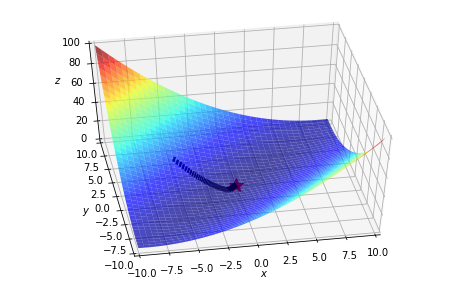

In [51]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-100)

x_path, y_path = gdpv(x_init=-5, y_init=3, n_iter=2000, steps=0.06, tol=1e-8)
path= np.vstack((x_path, y_path))


ax.plot_surface(x,y,z,alpha=0.7,cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], Matyas_Function(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], Matyas_Function(*(path[::,1:]-path[::,:-1])),
          linewidth = 5, length= 0.7,
          color='k')
ax.plot(*minima_, Matyas_Function(*minima_), 'r*', markersize=15)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

## Experiment with two variants of gradient descent to see if they improve in any way on the above results. Communicate your results with easy to understand text, tables and graphics (and/or animations).

In [18]:
def nag(x_init, y_init, n_iter, steps, a, tol=1e-8):
    x = x_init
    y = y_init
    z = Matyas_Function(x,y)
    
    x_path= []
    y_path = []
    z_path = []
    x_path.append(x)
    y_path.append(y)
    z_path.append(z)
    
    
    dx, dy = mat_grad(x, y)
    nu_x = 0
    nu_y = 0

    for i in range(n_iter): 
        if dx < tol:
            break
        mu = 1 - 3 / (i + 1 + 5)
        dx, dy = mat_grad(x - mu*nu_x, y - mu*nu_y)
        nu_x = a * nu_x + steps * dx
        nu_y = a * nu_y + steps * dy
        y += -nu_y 
        x += -nu_x  # step 
        x_path.append(x)
        y_path.append(y)
        z_this = Matyas_Function(x,y)
        z_path.append(z_this)
        
    if np.isnan(dx) or np.isnan(dy):
        print('\033[1m  Plain Vanilla  \033[0m \nExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol:
        print('\033[1m  Plain Vanilla  \033[0m \nDid not converge')
    else:
        print('\033[1m  Plain Vanilla  \033[0m \nConverged in {} steps.  \nLoss fn {:0.4f} \nAchieved at coordinates x,y = ({:0.4f}, {:0.4f})'.format(i, z, x, y))
        
        return x_path,y_path

        
def momentum(x_init, y_init, n_iter, steps, a, tol=1e-8):
    
    x = x_init
    y = y_init
    z = Matyas_Function(x,y)
    
    x_path= []
    y_path = []
    z_path = []
    x_path.append(x)
    y_path.append(y)
    z_path.append(z)
     
        
    dx, dy = mat_grad(x, y)
    nu_x = 0
    nu_y = 0
    

    for i in range(n_iter): 
        if dx < tol:
            break
        mu = 1 - 3 / (i + 1 + 5)
        dx, dy = mat_grad(x, y)
        nu_x = a * nu_x + steps * dx
        nu_y = a * nu_y + steps * dy
        y += -nu_y 
        x += -nu_x  # step 
        x_path.append(x)
        y_path.append(y)
        z_this = Matyas_Function(x,y)
        z_path.append(z_this)
    
    if np.isnan(dx) or np.isnan(dy):
        print('\033[1m  Plain Vanilla  \033[0m \nExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol:
        print('\033[1m  Plain Vanilla  \033[0m \nDid not converge')
    else:
        print('\033[1m  Plain Vanilla  \033[0m \nConverged in {} steps.  \nLoss fn {:0.4f} \nAchieved at coordinates x,y = ({:0.4f}, {:0.4f})'.format(i, z, x, y))
        
        return x_path,y_path


In [61]:
x_path, y_path = nag(x_init=5, y_init=-7.5, n_iter=4000, steps=0.005, tol=1e-8, a=0.9)

  Plain Vanilla   
Converged in 50 steps.  
Loss fn 39.1250 
Achieved at coordinates x,y = (-1.1260, -1.1748)


In [62]:
path= np.vstack((x_path, y_path))

  Plain Vanilla   
Converged in 1999 steps.  
Loss fn 0.0000 
Achieved at coordinates x,y = (-0.0003, -0.0003)
  Plain Vanilla   
Converged in 4994 steps.  
Loss fn 39.1250 
Achieved at coordinates x,y = (-0.9830, -1.0649)


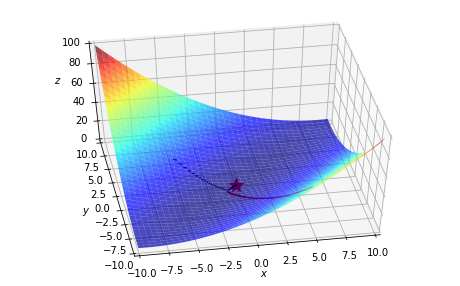

In [65]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = -10, 10, 0.5
ymin, ymax, ystep = -10, 10, 0.5

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = Matyas_Function(x, y)


# Obtain the path taken by pv gradient descent 
x_path, y_path = gdpv(x_init=-5, y_init=3, n_iter=2000, steps=0.1, tol=1e-8)
path = np.vstack((x_path, y_path))


x_path_kristin, y_path_kristin = nag(x_init=5, y_init=-7.5, n_iter=5000, steps=0.0001, tol=1e-8, a=0.9)
path_nag = np.vstack((x_path_kristin, y_path_kristin))




fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-100)

ax.plot_surface(x,y,z,alpha=0.7,cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], Matyas_Function(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], Matyas_Function(*(path[::,1:]-path[::,:-1])),
          linewidth = 1, length= 0.7,
          color='k')
ax.quiver(path_nag[0,:-1], path_nag[1,:-1], Matyas_Function(*path_nag[::,:-1]), 
          path_nag[0,1:]-path_nag[0,:-1], path_nag[1,1:]-path_nag[1,:-1], Matyas_Function(*(path_nag[::,1:]-path_nag[::,:-1])),
          linewidth = 1, length= 0.7,
          color='red')
ax.plot(*minima_, Matyas_Function(*minima_), 'r*', markersize=15)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)



ax.plot_surface(x, y, z, rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, Matyas_Function(*minima_), 'r*', markersize=10)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))

# Creating a 3D Video

In [54]:
# http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [23]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(Matyas_Function(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(Matyas_Function(*path[::,i-1:i]))
    return line, point


In [24]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

Traceback (most recent call last):
  File "/Users/kristinjensen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/kristinjensen/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/kristinjensen/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._drawn_artists = self._init_func()
  File "<ipython-input-22-295250428014>", line 4, in init
    line.set_data([], [])
NameError: name 'line' is not defined


In [236]:
#download ffmpeg pac
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
HTML(anim.to_html5_video())